In [1]:
import pandas as pd
import numpy as np
from pydataset import data
from pandas_profiling import ProfileReport
import env
import wrangle
import matplotlib.pyplot as plt
import split_scale
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import explore
import evaluate

In [36]:
tips = data('tips')

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


# Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [38]:
from sklearn.model_selection import train_test_split
seed = 123

train, test = train_test_split(tips, train_size=.80, random_state=seed)

print(train.shape, test.shape)

(195, 7) (49, 7)


In [39]:
train = train[['total_bill', 'tip']]
train.head()

,total_bill,tip
24,39.42,7.58
191,15.69,1.50
210,12.76,2.23
11,10.27,1.71
197,10.34,2.00


In [40]:
train.columns = ['x', 'y']
train.head()

,x,y
24,39.42,7.58
191,15.69,1.50
210,12.76,2.23
11,10.27,1.71
197,10.34,2.00


In [41]:
train['yhat_bl'] = train.y.mean()

In [42]:
train.head()

,x,y,yhat_bl
24,39.42,7.58,3.021641
191,15.69,1.50,3.021641
210,12.76,2.23,3.021641
11,10.27,1.71,3.021641
197,10.34,2.00,3.021641


In [43]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_bl = sqrt(mean_squared_error(train.y, train.yhat_bl))


In [44]:
print(rmse_bl)

1.469676180750581


In [45]:
from statsmodels.formula.api import ols

# generate parameters, i.e. create model
ols_model = ols('y ~ x', data = train).fit()

# compute predictions and add to original dataframe
train['yhat'] = ols_model.predict(train.x)
train.head(3)

,x,y,yhat_bl,yhat
24,39.42,7.58,3.021641,5.272078
191,15.69,1.50,3.021641,2.576639
210,12.76,2.23,3.021641,2.243827


In [46]:
rmse = sqrt(mean_squared_error(train.y, train.yhat))
rmse

1.06736020074831

# Plot the residuals for the linear regression model that you made.

In [47]:
train['residual'] = train['yhat'] - train['y']
train['residual_baseline'] = train['yhat_bl'] - train['y']

In [48]:
train.head()

,x,y,yhat_bl,yhat,residual,residual_baseline
24,39.42,7.58,3.021641,5.272078,-2.307922,-4.558359
191,15.69,1.50,3.021641,2.576639,1.076639,1.521641
210,12.76,2.23,3.021641,2.243827,0.013827,0.791641
11,10.27,1.71,3.021641,1.960993,0.250993,1.311641
197,10.34,2.00,3.021641,1.968944,-0.031056,1.021641


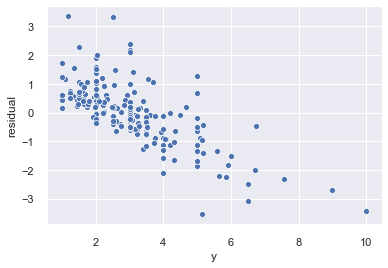

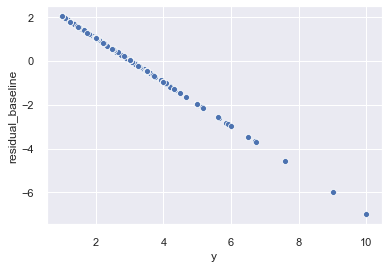

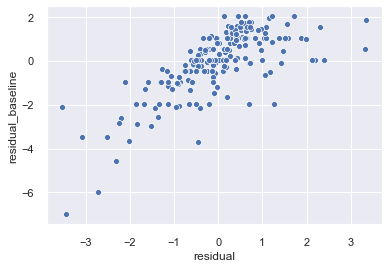

In [49]:
sns.scatterplot(x='y', y='residual',  data=train)
plt.figure()
sns.scatterplot(x='y', y='residual_baseline',  data=train)
plt.figure()
sns.scatterplot(x='residual', y='residual_baseline',  data=train)

# Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

 # Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).




In [50]:
from sklearn.metrics import mean_squared_error

SSE = mean_squared_error(train.y, train.yhat)*len(train)
SSE_baseline = mean_squared_error(train.y, train.yhat_bl)*len(train)

SSE, SSE_baseline

(222.15527063758722, 421.18987487179476)

In [51]:
ESS = sum((train.yhat - train.y.mean())**2)
ESS_baseline = sum((train.yhat_bl - train.y.mean())**2)


ESS, ESS_baseline

(199.03460423420773, 0.0)

In [52]:
TSS = ESS + SSE
TSS_baseline = ESS_baseline + SSE_baseline

TSS, TSS_baseline

(421.1898748717949, 421.18987487179476)

In [53]:
MSE = mean_squared_error(train.y, train.yhat)

MSE_baseline = mean_squared_error(train.y, train.yhat_bl)

MSE, MSE_baseline

(1.1392577981414729, 2.1599480762656142)

In [54]:
RMSE = sqrt(mean_squared_error(train.y, train.yhat))
RMSE_baseline = sqrt(mean_squared_error(train.y, train.yhat_bl))

RMSE, RMSE_baseline

(1.06736020074831, 1.469676180750581)

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.


In [55]:
df_eval = pd.DataFrame(np.array(['SSE','ESS', 'TSS', 'MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','ESS_baseline', 'TSS_baseline', 'MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, ESS, TSS, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, ESS_baseline,TSS_baseline,MSE_baseline, RMSE_baseline])


print(df_eval)
print(df_baseline_eval)

  metric  model_error
0    SSE   222.155271
1    ESS   199.034604
2    TSS   421.189875
3    MSE     1.139258
4   RMSE     1.067360
          metric  model_error
0   SSE_baseline   421.189875
1   ESS_baseline     0.000000
2   TSS_baseline   421.189875
3   MSE_baseline     2.159948
4  RMSE_baseline     1.469676


In [56]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval

,metric,model_error,error_delta
0,SSE,222.155271,-1.990346e+02
1,ESS,199.034604,1.990346e+02
2,TSS,421.189875,1.705303e-13
3,MSE,1.139258,-1.020690e+00
4,RMSE,1.067360,-4.023160e-01



# What is the amount of variance explained in your model?



In [57]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     172.9
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           1.29e-28
Time:                        14:28:12   Log-Likelihood:                -289.40
No. Observations:                 195   AIC:                             582.8
Df Residuals:                     193   BIC:                             589.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7944      0.186      4.272      0.000       0.428       1.161
x              0.1136      0.009     13.150      0.000       0.097       0.131
==============================================================================
Omnibus:                       11.928   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               20.439
Skew:                           0.308   Prob(JB):                     3.65e-05
Kurtosis:                       4.461   Cond. No.                         52.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Is your model significantly better than the baseline model?

The p value for F-statistic is very small. Hence the results are statisticaly significant. The model performs better than baseline as it has lower RMSE.

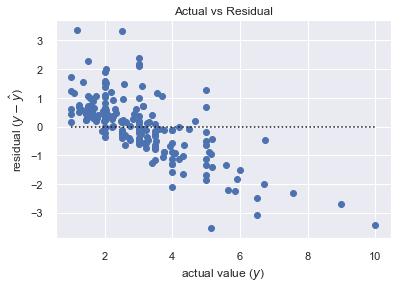

In [58]:
evaluate.plot_residuals(train['y'], train['yhat'], train)

In [59]:
evaluate.regression_errors(train['y'], train['yhat'], train)

{'SSE': 222.15527063758722,
 'ESS': 199.03460423420773,
 'TSS': 421.1898748717949,
 'MSE': 1.1392577981414729,
 'RMSE': 1.06736020074831}

In [60]:
evaluate.baseline_mean_errors(train['y'], train)

{'SSE_bl': 421.18987487179476,
 'MSE_bl': 2.1599480762656142,
 'RMSE_bl': 1.469676180750581}

In [61]:
evaluate.better_than_baseline(train['y'], train['yhat'], train)

True

In [62]:
evaluate.model_significance(ols_model)

R-squared =  0.473
p-value for model significance =  0.0


# Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [19]:
mpg = data('mpg')

In [20]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [21]:
from sklearn.model_selection import train_test_split
seed = 123

train, test = train_test_split(mpg, train_size=.80, random_state=seed)

print(train.shape, test.shape)

(187, 11) (47, 11)


In [22]:
train = train[['displ', 'hwy']]
train.head()

,displ,hwy
11,2.0,27
178,4.0,20
188,2.2,29
27,6.2,25
12,2.8,25


In [23]:
train.columns = ['x', 'y']

In [24]:
from statsmodels.formula.api import ols


ols_model = ols('y ~ x', data = train).fit()

In [25]:
train['yhat'] = ols_model.predict(train.x)
train.head(3)

,x,y,yhat
11,2.0,27,28.961501
178,4.0,20,21.509483
188,2.2,29,28.216299


In [26]:
train['yhat_bl'] = train.y.mean()
train.head()

,x,y,yhat,yhat_bl
11,2.0,27,28.961501,23.812834
178,4.0,20,21.509483,23.812834
188,2.2,29,28.216299,23.812834
27,6.2,25,13.312264,23.812834
12,2.8,25,25.980694,23.812834


In [27]:
train['residual_bl'] = train['yhat_bl']- train['y']

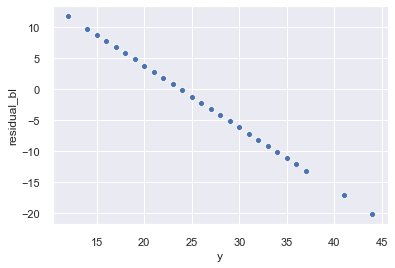

In [28]:
sns.scatterplot(x= train['y'], y = train['residual_bl'])

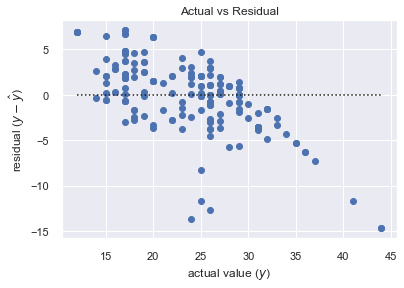

In [29]:
evaluate.plot_residuals(train['y'], train['yhat'], train)

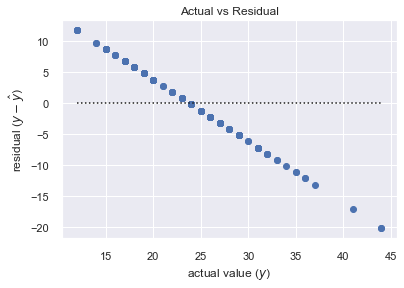

In [30]:
evaluate.plot_residuals(train['y'], train['yhat_bl'], train)

In [31]:
evaluate.regression_errors(train['y'], train['yhat'], train)

{'SSE': 2849.101802543057,
 'ESS': 4199.347395317911,
 'TSS': 7048.449197860968,
 'MSE': 15.235838516273033,
 'RMSE': 3.903311224623657}

In [32]:
evaluate.baseline_mean_errors(train['y'], train)

{'SSE_bl': 7048.449197860962,
 'MSE_bl': 37.69224169979124,
 'RMSE_bl': 6.139400760643602}

In [33]:
evaluate.better_than_baseline(train['y'], train['yhat'], train)

True

In [34]:
evaluate.model_significance(ols_model)

R-squared =  0.596
p-value for model significance =  0.0


In [35]:
# can convert the dictionary into a panda series
pd.Series(evaluate.regression_errors(train['y'], train['yhat'], train))

SSE     2849.101803
ESS     4199.347395
TSS     7048.449198
MSE       15.235839
RMSE       3.903311
dtype: float64